In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Load the Model

In [2]:
model = tf.keras.models.load_model("dataset/object_detection.h5")

## Load Image

In [3]:
image = load_img(path="dataset/data/N1.jpeg")
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)

image1 = load_img(path="dataset/data/N1.jpeg", target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and normalize output

In [4]:
# size of the image
image.shape

(1080, 1920, 3)

(-0.5, 1919.5, 1079.5, -0.5)

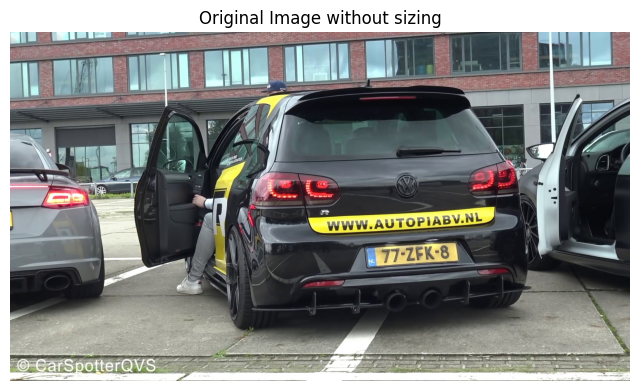

In [5]:
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Original Image without sizing")
plt.axis("off")

In [6]:
# size of the image1
image_arr_224.shape

(224, 224, 3)

In [7]:
# reshaping

test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

## Prediction

In [8]:
coords = model.predict(test_arr)
coords

1/1 [==============================] - 15s 15s/step


array([[0.56891584, 0.7250234 , 0.5955808 , 0.6709129 ]], dtype=float32)

## Denormalization

In [9]:
h,w,d = image.shape

In [10]:
denorm = np.array([w,w,h,h])
coords = coords * denorm

coords

array([[1092.31842041, 1392.04490662,  643.22728157,  724.58595514]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[1092, 1392,  643,  724]])

## Bounding Box

(1092, 643) (1392, 724)


(-0.5, 1919.5, 1079.5, -0.5)

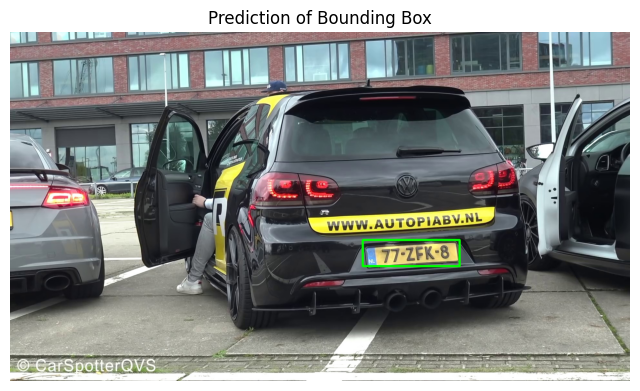

In [12]:
xmin, xmax, ymin, ymax = coords[0]

pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

print(pt1, pt2)

cv2.rectangle(image, pt1, pt2, (0,255,0), 5)

plt.figure(figsize=(8,6))
plt.imshow(image)
plt.title("Prediction of Bounding Box")
plt.axis("off")

## Pipeline

In [13]:
path="dataset/data/N1.jpeg"

def object_detection(path):
    # read image
    image = load_img(path) #PIL Object
    image = np.array(image, dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path, target_size=(224,224))
    
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and normalize output

    # get the shape
    h,w,d = image.shape

    # resize
    test_arr = image_arr_224.reshape(1,224,224,3)

    # prediction
    coords = model.predict(test_arr)

    # denormalize
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)

    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2, (0,255,0), 5)
    
    return image, coords

1/1 [==============================] - 0s 497ms/step
(267, 316) (638, 421)


(-0.5, 801.5, 556.5, -0.5)

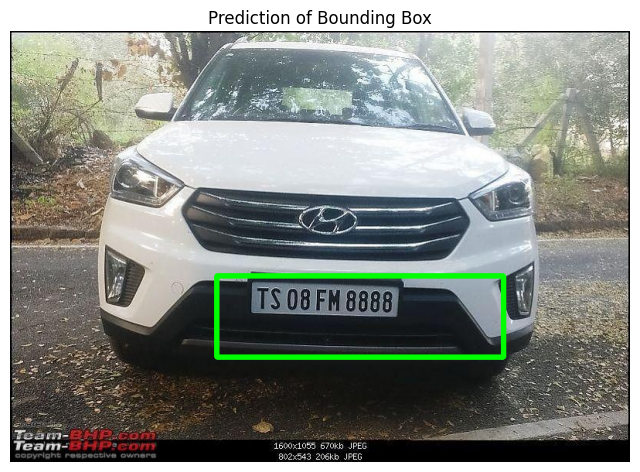

In [14]:
img,coords = object_detection(path="dataset/data/N121.jpeg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

1/1 [==============================] - 0s 391ms/step
(795, 770) (1860, 1323)


(-0.5, 2284.5, 1713.5, -0.5)

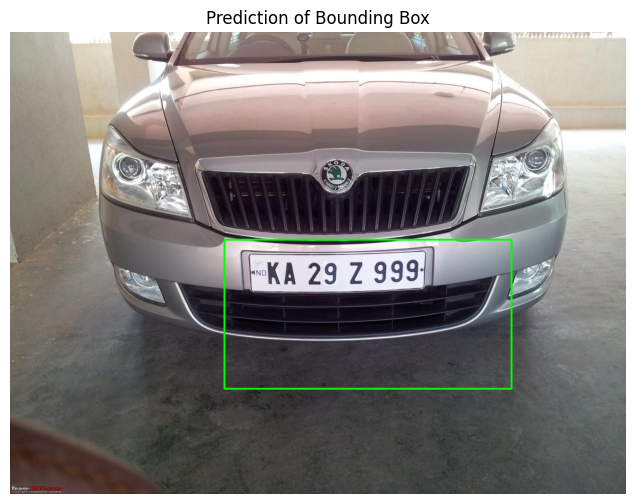

In [15]:
img,coords = object_detection(path="dataset/data/N190.jpeg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

1/1 [==============================] - 1s 507ms/step
(266, 330) (533, 380)


(-0.5, 649.5, 571.5, -0.5)

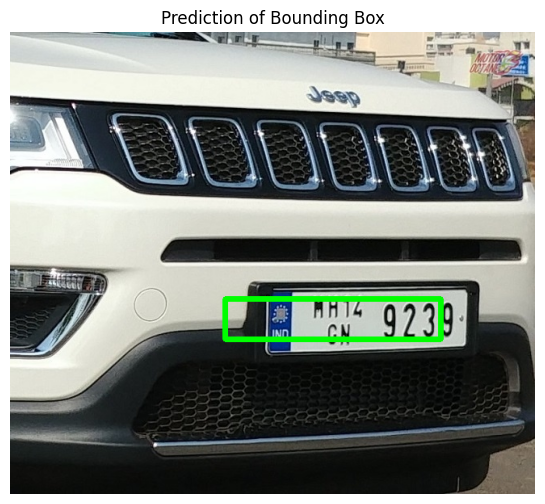

In [16]:
img,coords = object_detection(path="dataset/data/N191.jpeg")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

# OCR - Optical Character Recognition

In [17]:
import pytesseract as pt

1/1 [==============================] - 0s 421ms/step
(1092, 643) (1392, 724)


(-0.5, 1919.5, 1079.5, -0.5)

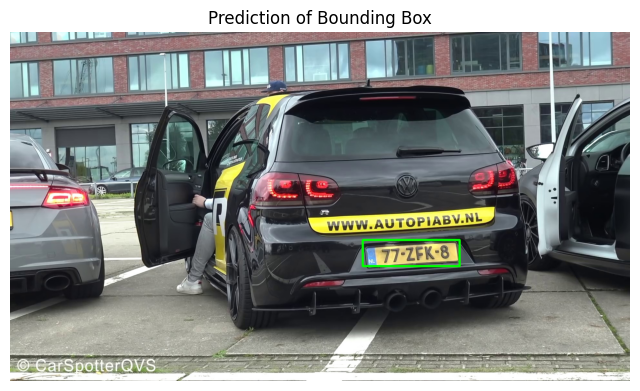

In [18]:
path="dataset/data/N1.jpeg"

img,coords = object_detection(path)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Prediction of Bounding Box")
plt.axis("off")

(-0.5, 299.5, 80.5, -0.5)

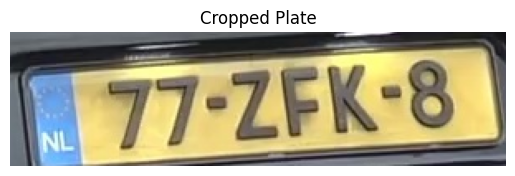

In [19]:
img = np.array(load_img(path))

xmin, xmax, ymin, ymax = coords[0]
roi = img[ymin:ymax, xmin:xmax]

plt.imshow(roi)
plt.title("Cropped Plate")
plt.axis("off")

## Extract Text from the Plate

In [20]:
text = pt.image_to_string(roi)

print(text)

t TT-ZEK'8 |

